In [1]:
from graph_analyser import GraphAnalyser
from graph_analyser import GranGapEstimater
from graph_analyser import GranLinker
from graph_structure import KnowledgeGraph
from graph_builder import GraphBuilder

In [2]:
import networkx as nx

In [3]:
builder = GraphBuilder()

2024-06-26 14:17:14 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


2024-06-26 14:17:17 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-06-26 14:17:17 INFO: Using device: cpu
2024-06-26 14:17:17 INFO: Loading: tokenize
2024-06-26 14:17:17 INFO: Loading: pos
2024-06-26 14:17:18 INFO: Loading: lemma
2024-06-26 14:17:18 INFO: Loading: depparse
2024-06-26 14:17:18 INFO: Loading: ner
2024-06-26 14:17:22 INFO: Done loading processors!


In [4]:
sentence = "Разобьем линейный участок газопровода узлами сеточной аппроксимации на конечные элементы длины"

In [5]:
Graph_1 = builder.create_syntax_graph_for_sentence(sentence)

--------------------------------------------------------------------------------
разбить             root                VERB                длины
линейный            amod                ADJ                 участок
участок             obj                 NOUN                Разобьем
--------------------------------------------------------------------------------
газопровод          nmod                NOUN                участок
узел                obl                 NOUN                Разобьем
сеточный            amod                ADJ                 аппроксимации
--------------------------------------------------------------------------------
аппроксимация       nmod                NOUN                узлами
на                  case                ADP                 элементы
конечный            amod                ADJ                 элементы
--------------------------------------------------------------------------------
элемент             obl                 NOUN             

In [6]:
Graph_2 = builder.extract_noun_phrases(sentence)

In [17]:
Graph_1_1 = nx.DiGraph()
Graph_1_1.add_nodes_from(Graph_1.nodes)
Graph_1_1.add_edges_from(Graph_1.edges)

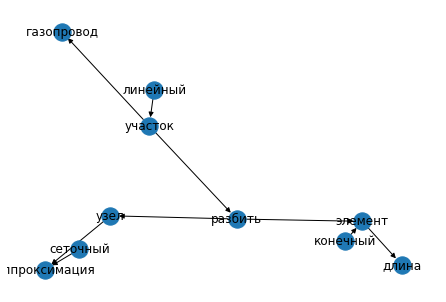

In [19]:
nx.draw(Graph_1_1,with_labels = True)

In [11]:
for e in Graph_1.nodes():
    print(e, Graph_1.nodes[e])

линейный {'locations': [{'t': '', 'p': 13.0}], 'color': 'white'}
участок {'locations': [{'t': '', 'p': 21.5}, {'t': '', 'p': 21.5}, {'t': '', 'p': 21.5}], 'color': 'black'}
разбить {'locations': [{'t': '', 'p': 4.0}, {'t': '', 'p': 4.0}, {'t': '', 'p': 4.0}], 'color': 'black'}
газопровод {'locations': [{'t': '', 'p': 31.5}], 'color': 'white'}
узел {'locations': [{'t': '', 'p': 41.0}, {'t': '', 'p': 41.0}], 'color': 'black'}
сеточный {'locations': [{'t': '', 'p': 49.0}], 'color': 'white'}
аппроксимация {'locations': [{'t': '', 'p': 60.5}, {'t': '', 'p': 60.5}], 'color': 'white'}
конечный {'locations': [{'t': '', 'p': 75.0}], 'color': 'white'}
элемент {'locations': [{'t': '', 'p': 84.0}, {'t': '', 'p': 84.0}, {'t': '', 'p': 84.0}], 'color': 'black'}
длина {'locations': [{'t': '', 'p': 91.5}], 'color': 'white'}


In [12]:
for e in Graph_1.edges():
    print(e, Graph_1.edges[e])

('линейный', 'участок') {'label': [1, ' '], 'locations': [{'t': '', 'p': 17.25}]}
('участок', 'разбить') {'label': [1, ' '], 'locations': [{'t': '', 'p': 12.75}]}
('участок', 'газопровод') {'label': [1, ' '], 'locations': [{'t': '', 'p': 26.5}]}
('разбить', 'узел') {'label': [1, ' '], 'locations': [{'t': '', 'p': 22.5}]}
('разбить', 'элемент') {'label': [1, ' '], 'locations': [{'t': '', 'p': 44.0}]}
('узел', 'аппроксимация') {'label': [1, ' '], 'locations': [{'t': '', 'p': 50.75}]}
('сеточный', 'аппроксимация') {'label': [1, ' '], 'locations': [{'t': '', 'p': 54.75}]}
('конечный', 'элемент') {'label': [1, ' '], 'locations': [{'t': '', 'p': 79.5}]}
('элемент', 'длина') {'label': [1, ' '], 'locations': [{'t': '', 'p': 87.75}]}


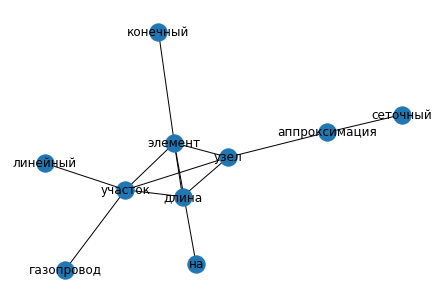

In [8]:
nx.draw(Graph_2, with_labels = True)

In [9]:
for e in Graph_2.nodes():
    print(e, Graph_2.nodes[e])

длина {'color': 'red', 'locations': [1]}
линейный {'color': 'orange', 'locations': [1]}
участок {'color': 'red', 'locations': [1]}
газопровод {'color': 'red', 'locations': [1]}
узел {'color': 'red', 'locations': [1]}
сеточный {'color': 'orange', 'locations': [1]}
аппроксимация {'color': 'red', 'locations': [1]}
на {'color': 'orange', 'locations': [1]}
элемент {'color': 'red', 'locations': [1]}
конечный {'color': 'orange', 'locations': [1]}


In [10]:
for e in Graph_2.edges():
    print(e, Graph_2.edges[e])

('длина', 'элемент') {'label': 'verb link', 'locations': [1]}
('длина', 'участок') {'label': 'verb link', 'locations': [1]}
('длина', 'узел') {'label': 'verb link', 'locations': [1]}
('линейный', 'участок') {'label': 'p link', 'locations': [1]}
('участок', 'газопровод') {'label': 'sub link', 'locations': [1]}
('участок', 'узел') {'label': 'verb link', 'locations': [1]}
('участок', 'элемент') {'label': 'verb link', 'locations': [1]}
('узел', 'аппроксимация') {'label': 'sub link', 'locations': [1]}
('узел', 'элемент') {'label': 'verb link', 'locations': [1]}
('сеточный', 'аппроксимация') {'label': 'p link', 'locations': [1]}
('на', 'элемент') {'label': 'p link', 'locations': [1]}
('элемент', 'конечный') {'label': 'p link', 'locations': [1]}


In [ ]:
test_graph = KnowledgeGraph() 

In [ ]:
work_dir = "vspu_2019"

In [8]:
test_graph_builder = GraphBuilder()

2024-03-05 22:13:35 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-05 22:13:38 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

2024-03-05 22:13:38 INFO: Using device: cuda
2024-03-05 22:13:38 INFO: Loading: tokenize
2024-03-05 22:13:43 INFO: Loading: pos
2024-03-05 22:13:44 INFO: Loading: lemma
2024-03-05 22:13:44 INFO: Loading: depparse
2024-03-05 22:13:44 INFO: Loading: ner
2024-03-05 22:13:45 INFO: Done loading processors!


In [5]:
test_graph_builder.select_work_dir(work_dir)
test_graph_builder.extract_text_from_pdfs()

in 	vspu_2019
files	 1228
txts	 614
pdfs	 614
converted 0 files
in 	vspu_2019
files	 1228
txts	 614
pdfs	 614


In [4]:
list = [[(1,2),(3,4)],[(1,2),(3,4)]]

In [6]:
test_graph = test_graph_builder.add_all_files_to_graph(test_graph)

 99%|███████████████████████████████████████████████████████████████████████████▍| 1219/1228 [2:35:18<01:08,  7.64s/it]


MemoryError: Unable to allocate 69.5 MiB for an array with shape (3018, 3018) and data type float64

In [7]:
print(len(test_graph.G.nodes))
print(len(test_graph.G.edges))

24522

In [29]:
test_graph = test_graph_builder.apply_node_frequency_limit(test_graph, limit = 11)
test_graph = test_graph_builder.apply_edge_frequency_limit(test_graph, limit = 6)
#test_graph = test_graph_builder.apply_word_reasonability_check(test_graph)

removed 1467 nodes
removed 0 edges


In [30]:
print(len(test_graph.G.nodes))
print(len(test_graph.G.edges))

3451
3987


In [31]:
import networkx as nx
test_graph.pos = nx.random_layout(test_graph.G)
test_graph.pos = {node : [str(pos[0]), str(pos[1])] for node, pos in test_graph.pos.items()}

In [32]:
linker = GranLinker(test_graph)

In [33]:
links_f = linker.produce_frequency_links(top_p = 100)
print("links _f:\t done")
# links_d = linker.produce_distance_links(top_p = 100) # это выбирает из всевозможных пар, а не только существующих связей
# print("links _d:\t done")
# links_s = linker.produce_semantic_links(top_p=100)
# print("links _s:\t done")
links = [links_f]#, links_d, links_s]
linker.imprint_links(links)

links _f:	 done


In [34]:
test_graph.save("vspu_2019_graph_high_filter")

In [18]:
import networkx as nx
from graph_structure import KnowledgeGraph

graph = KnowledgeGraph()
graph.load("vspu_2019_graph_low_filter")
networkx_graph = graph.G

In [19]:
graph = test_graph_builder.apply_node_frequency_limit(graph, limit = 3)
graph = test_graph_builder.apply_edge_frequency_limit(graph, limit = 3)

removed 1773 nodes
removed 11594 edges


In [20]:
graph.save("vspu_2019_graph_3_3")

In [17]:
test_graph.pos = nx.random_layout(test_graph.G)

In [22]:
test_graph.pos = {node : [str(pos[0]), str(pos[1])] for node, pos in test_graph.pos.items()}

In [20]:
links_f = linker.produce_frequency_links(top_p = 100)
print("links _f:\t done")
# links_d = linker.produce_distance_links(top_p = 100) # это выбирает из всевозможных пар, а не только существующих связей
# print("links _d:\t done")
# links_s = linker.produce_semantic_links(top_p=100)
# print("links _s:\t done")
links = [links_f]#, links_d, links_s]
linker.imprint_links(links)

links _f:	 done


In [23]:
test_graph.save("vspu_2019_graph")

======================================== Делаем расстояния по графу ========================================

In [96]:
import random
from tqdm import tqdm
import numpy as np
import pylab

In [34]:
import networkx as nx
from graph_structure import KnowledgeGraph

graph = KnowledgeGraph()
graph.load("vspu_2019_graph_3_3")
networkx_graph = graph.G

In [33]:
print(len(graph.G.nodes))
print(len(graph.G.edges))

7060
12396


In [43]:
print("работа" in networkx_graph.nodes)
print("объем" in networkx_graph.nodes)

True
True


In [46]:
dist_graph = nx.Graph()
dist_graph.add_nodes_from(networkx_graph.nodes())
for link in graph.links["freq_link"]:
    dist_graph.add_edge(*link, **graph.links["freq_link"][link])

In [50]:
nx.shortest_path_length(dist_graph, "работа", "объем")

2

In [48]:
nx.shortest_path_length(dist_graph, "работа", "объем", weight = "score")

0.12048294495103005

In [51]:
nx.shortest_path(dist_graph, "работа", "объем", weight = "score")

['работа', 'система', 'большой', 'объем']

In [52]:
nx.shortest_path(dist_graph, "работа", "объем")

['работа', 'ресурс', 'объем']

In [84]:
from networkx.classes.function import path_weight

In [66]:
subgraph_1 = []
subgraph_2 = []
subgraph_len = 50
for _ in range(subgraph_len):
    subgraph_1.append(random.choice(list(graph.G.nodes)))
    subgraph_2.append(random.choice(list(graph.G.nodes)))

In [68]:
subgraph_1 = graph.G.subgraph(subgraph_1)
subgraph_2 = graph.G.subgraph(subgraph_2)

In [91]:
# расстояние от вершин до графа
for node in tqdm(subgraph_1.nodes):
    for other in subgraph_2.nodes:
        try:
            path = nx.shortest_path(dist_graph, node, other)
            path_length = path_weight(dist_graph, path, weight = "score")
        except BaseException:
            pass

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 12194.19it/s]


Смотрим на узлы и их частоты

In [95]:
narr = []
for num, node in enumerate(graph.G.nodes):
    narr.append([num, len(graph.G.nodes[node]["locations"])])
narr = np.array(narr)

In [99]:
narr[:,1].mean()

56.50552407932011

In [103]:
np.median(narr[:,1])

10.0

In [111]:
np.quantile(narr[:,1], [0.95])

array([214.1])

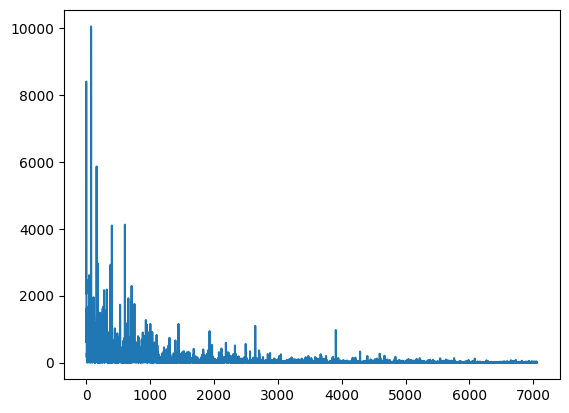

In [97]:
pylab.plot(narr[:,0], narr[:,1])

In [112]:
for num, node in enumerate(graph.G.nodes):
    if len(graph.G.nodes[node]["locations"]) > 200:
        print(node)

всероссийский
совещание
проблема
управлений
год
москва
создание
работа
новый
вид
эффект
использование
современный
этап
развитие
разработка
производство
исследование
основа
пример
применение
характеристика
процесс
случайный
иметь
материал
отсутствие
являться
часть
высокий
коэффициент
время
система
однако
необходимость
фактор
ряд
размер
диапазон
другой
рассматривать
точность
положение
построение
важный
элемент
большой
количество
компания
страна
оценка
возможность
снижение
уровень
ресурс
интерес
число
необходимый
сложный
аппарат
класс
скорость
датчик
база
технология
управление
движение
тема
реализация
объем
решение
мочь
принцип
действие
поле
форма
первый
измерение
результат
длина
малый
определенный
ской
степень
повышение
направление
данные
различный
литература
список
с.
состояние
область
основание
в.
д.
к.
г.
основной
концепция
сеть
устройство
набор
физический
пользователь
алгоритм
программа
фонд
поддержка
способность
информация
мониторинг
объект
должен
реальный
также
адаптивный
цель
наук

========================================

In [1]:
from graph_analyser import GraphAnalyser
from graph_structure import KnowledgeGraph

In [2]:
test_graph = KnowledgeGraph() 

In [4]:
test_graph.load("test_save")

In [5]:
test_graph.save("test_save")

In [5]:
gran = GraphAnalyser(test_graph)

In [10]:
#test_graph.compute_layout(use_links=False)

In [7]:
links_f = gran.produce_frequency_links(top_p = 100)
print("links _f:\t done")
links_d = gran.produce_distance_links(top_p = 100) # это выбирает из всевозможных пар, а не только существующих связей
print("links _d:\t done")
links_s = gran.produce_links(link_type = "sem_link", top_p=100)
print("links _s:\t loaded")
links = {**links_f, **links_d, **links_s}
gran.imprint_links(links)
test_graph.save("test_save")

links _f:	 done
links _d:	 done
links _s:	 loaded


In [11]:
# links_f = gran.produce_frequency_links(top_p = 100)
# print("links _f:\t done")
# links_d = gran.produce_distance_links(top_p = 100) # это выбирает из всевозможных пар, а не только существующих связей
# print("links _d:\t done")
# links_s = gran.produce_semantic_links(top_p = 100)
# print("links _s:\t done")
# links = {**links_f, **links_d, **links_s}
# gran.imprint_links(links)

links _f:	 done
links _d:	 done


Some weights of RobertaModel were not initialized from the model checkpoint at ai-forever/ruSciBERT and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████████████████████████████████████████████████████████████████████████| 2310/2310 [14:19<00:00,  2.69it/s]


links _s:	 done


In [12]:
# test_graph.save("test_save.kg")

In [6]:
links_f = gran.produce_links(link_type = "freq_link", top_p=10)
links_d = gran.produce_links(link_type = "dist_link", top_p=1)
links_s = gran.produce_links(link_type = "sem_link", top_p=1)
links = {**links_f, **links_d, **links_s}

In [9]:
{"as" : 10, "as" : 15}

{'as': 15}

========================================

In [1]:
from graph_analyser import GraphAnalyser
from graph_analyser import GranGapEstimater
from graph_analyser import GranLinker
from graph_structure import KnowledgeGraph
from graph_builder import GraphBuilder

In [2]:
test_graph = KnowledgeGraph() 

In [3]:
test_graph.load("graph_structure_a0")

In [4]:
estimator = GranGapEstimater(test_graph)

In [5]:
estimator.estimate_gap_simple(
    "Ограничения на суммарный расход ресурса в конкретные моменты времени могут учитываться в том случае если его остатки не использованные в предыдущие моменты времени не остаются в распоряжении Центра Данные ограничения могут иметь вид",
    "Произведя необходимую компоновку элементов и применив команду трассировки к модели печатной платы можно получить готовую разведенную плату рис рис",
    trace = True
)

lens: 	 20 6
i: 	 0
u: 	 26


0.0

# Графы тезауруса

In [9]:
import stanza
from tqdm import tqdm
import pylab
import pickle
import yargy
import numpy as np
import networkx as nx

In [10]:
from graph_builder import GraphBuilder
from graph_structure import KnowledgeGraph
from graph_analyser import GranLinker

In [2]:
parser = stanza.Pipeline(lang='ru', processors='tokenize,lemma')

2024-03-20 12:08:42 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


2024-03-20 12:08:43 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| lemma     | syntagrus_nocharlm |

2024-03-20 12:08:43 INFO: Using device: cpu
2024-03-20 12:08:43 INFO: Loading: tokenize


2024-03-20 12:08:44 INFO: Loading: lemma
2024-03-20 12:08:44 INFO: Done loading processors!


### Старые термины

In [7]:
with open("transfer/build_graph/table.pkl", "rb") as f:
    table = pickle.load(f)

In [8]:
terms = []
for item in table:
    doc = parser(item["term"]).sentences[0]
    term = ' '.join([elm.lemma for elm in doc.words])
    terms.append(term)

In [12]:
print(len(terms))

274

In [13]:
main_terms = terms[0:17]
objects_of_control = terms[17:41]
effects_and_signals = terms[41:88]
types_of_control = terms[88:133]
controlling_objects = terms[133:142]
control_systems = terms[142:149]
control_laws = terms[149:156]
control_systems_elements = terms[156:170]
control_systems_structures = terms[170:186]
control_systems_states = terms[186:233]
control_systems_properties = terms[233:247]
base = terms[247:]

### Новый граф

In [64]:
with open("transfer/build_graph/table_2.pkl", "rb") as f:
    table = pickle.load(f)
adjacency_table = np.load("transfer/build_graph/adjacency_table_2.npy")
terms = [item["term"] for item in table]

tokenizer = yargy.tokenizer.MorphTokenizer()
terms_norm = [" ".join([x.normalized for x in tokenizer(item)])
    for item in terms]


In [65]:
print(len(terms))

1040


In [66]:
G = nx.DiGraph()

for i in range(adjacency_table.shape[0]):
    for j in range(adjacency_table.shape[1]):
        if adjacency_table[i, j] == 1:
            G.add_edge(terms_norm[i], terms_norm[j])


In [67]:
counts_old = np.array([
    len(main_terms),
    len(objects_of_control),
    len(effects_and_signals),
    len(types_of_control),
    len(controlling_objects),
    len(control_systems),
    len(control_laws),
    len(control_systems_elements),
    len(control_systems_structures),
    len(control_systems_states),
    len(control_systems_properties),
    len(base),
])
counts = np.zeros(12, dtype = int)

In [68]:
for node in G.nodes:
    G.nodes[node]["locations"] = [{'t' : 'base_text', 'p' : 0}] # это надо чтобы расстояние были небольшие
for node in G.nodes:
    G.nodes[node]["color"] = ["grey"]
    
    if node in main_terms:
        G.nodes[node]["color"] = ["red"]
        counts[0] += 1
    if node in objects_of_control:
        G.nodes[node]["color"] = ["blue"]
        counts[1] += 1
    if node in effects_and_signals:
        G.nodes[node]["color"] = ["yellow"]
        counts[2] += 1
    if node in types_of_control:
        G.nodes[node]["color"] = ["orange"]
        counts[3] += 1
    if node in controlling_objects:
        G.nodes[node]["color"] = ["magenta"]
        counts[4] += 1
    if node in control_systems:
        G.nodes[node]["color"] = ["purple"]
        counts[5] += 1
    if node in control_laws:
        G.nodes[node]["color"] = ["green"]
        counts[6] += 1
    if node in control_systems_elements:
        G.nodes[node]["color"] = ["light blue"]
        counts[7] += 1
    if node in control_systems_structures:
        G.nodes[node]["color"] = ["white"]
        counts[8] += 1
    if node in control_systems_states:
        G.nodes[node]["color"] = ["dark green"]
        counts[9] += 1
    if node in control_systems_properties:
        G.nodes[node]["color"] = ["pink"]
        counts[10] += 1
    if node in base:
        G.nodes[node]["color"] = ["black"]
        counts[11] += 1
        

In [69]:
print(f"{sum(counts)} / {sum(counts_old)}\t old graph nodes in new")

32 / 274	 old graph nodes in new


In [70]:
print(f"{counts[0]} / {counts_old[0]}\t\tmain_terms")
print(f"{counts[1]} / {counts_old[1]}\t\tobjects_of_control")
print(f"{counts[2]} / {counts_old[2]}\t\teffects_and_signals")
print(f"{counts[3]} / {counts_old[3]}\t\ttypes_of_control")
print(f"{counts[4]} / {counts_old[4]}\t\tcontrolling_objects")
print(f"{counts[5]} / {counts_old[5]}\t\tcontrol_systems")
print(f"{counts[6]} / {counts_old[6]}\t\tcontrol_laws")
print(f"{counts[7]} / {counts_old[7]}\t\tcontrol_systems_elements")
print(f"{counts[8]} / {counts_old[8]}\t\tcontrol_systems_structures")
print(f"{counts[9]} / {counts_old[9]}\t\tcontrol_systems_states")
print(f"{counts[10]} / {counts_old[10]}\t\tcontrol_systems_properties")
print(f"{counts[11]} / {counts_old[11]}\t\tbase")

4 / 17		main_terms
0 / 24		objects_of_control
0 / 47		effects_and_signals
8 / 45		types_of_control
1 / 9		controlling_objects
0 / 7		control_systems
0 / 7		control_laws
1 / 14		control_systems_elements
0 / 16		control_systems_structures
2 / 47		control_systems_states
4 / 14		control_systems_properties
12 / 27		base


Смотрим на узлы

In [79]:
for node in G.nodes:    
    if node in main_terms:
        print(node)

управление
система управление
объект управление
обратный связь


In [80]:
def_from_main_terms = []
for node in G.nodes:    
    if node in main_terms:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_main_terms.append(n_node)

эти узлы определяются через предыдущие
автоматизация документооборот
автоматизированный система управление предприятие
автоматизированный система управление производство
автоматизированный система управление технологический процесс
автоматизированный система управление
автоматизированный рабочий место
автоматизированный управление
автоматический регулятор
автоматический управление
адаптивный обход интегратор
активный прогноз
ассистивный технология
база геоданные
бесконечномерный система управление
блочный подход
бортовый система управление
бэкстеппинг
высокореактивный система управление
гибридный система
горизонт планирование
динамический управляемый система
допустимый множество
живучесть
задача быстродействие
задача слежение
задача управление
идентификационный метод синтез
идентификация
измерительный технический средство управление
интегральный регулятор
интегрировать система управление
интеллектуальный управление
информационно - управлять система
информационный управление
исполнитель

===============================================

In [75]:
for node in G.nodes:    
    if node in types_of_control:
        print(node)

автоматизированный управление
автоматический управление
стабилизация
оптимальный управление
комбинированный управление
программный управление
регулирование
терминальный управление


In [81]:
def_from_types_of_control = []
for node in G.nodes:    
    if node in types_of_control:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_types_of_control.append(n_node)

пневмоавтоматика
теория автоматический управление
эталонный модель
гиростабилизированный платформа
максиминный тестирование
минимаксный стабилизация
робастный стабилизация
стабилизируемость
задача быстродействие
оптимальный управление
поисковый сигнал
прямой задача управление
уравнение ляпунов
уравнение риккати
система автоматизация технология производство
регулирование по возмущение
регулирование по отклонение регулировать величина
регулятор
система автоматический регулирование


===============================================

In [82]:
for node in G.nodes:    
    if node in controlling_objects:
        print(node)

регулятор


In [83]:
def_from_controlling_objects = []
for node in G.nodes:    
    if node in types_of_control:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_controlling_objects.append(n_node)

пневмоавтоматика
теория автоматический управление
эталонный модель
гиростабилизированный платформа
максиминный тестирование
минимаксный стабилизация
робастный стабилизация
стабилизируемость
задача быстродействие
оптимальный управление
поисковый сигнал
прямой задача управление
уравнение ляпунов
уравнение риккати
система автоматизация технология производство
регулирование по возмущение
регулирование по отклонение регулировать величина
регулятор
система автоматический регулирование


===============================================

In [84]:
for node in G.nodes:    
    if node in control_systems_elements:
        print(node)

датчик


In [85]:
def_from_control_systems_elements = []
for node in G.nodes:    
    if node in control_systems_elements:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_control_systems_elements.append(n_node)

бортовый система управление
модуль сопряжение с объект
фотоэлектрический датчик
чувствительный элемент


===============================================

In [53]:
for node in G.nodes:    
    if node in control_systems_states:
        print(node)

эффективность
передаточный функция


In [86]:
def_from_control_systems_states = []
for node in G.nodes:    
    if node in control_systems_states:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_control_systems_states.append(n_node)

авторефлексия
комплексный показатель надёжность
оптимальный управление
оптимизация
эпидемиологический модель
эффективность управление
непараметрический идентификация
перцептрон
функция активация
частотный неопределённость


===============================================

In [89]:
for node in G.nodes:    
    if node in control_systems_properties:
        print(node)

абсолютный устойчивость
управляемость
живучесть
идентифицируемость


In [90]:
def_from_control_systems_properties = []
for node in G.nodes:    
    if node in control_systems_properties:
        for n_node in G.predecessors(node):
            print(n_node)
            def_from_control_systems_properties.append(n_node)

анализ система управление
блочный подход
стабилизируемость
управляемость
функциональный избыточность


===============================================

In [55]:
for node in G.nodes:    
    if node in base:
        print(node)

объект
процесс
система
величина
внешний среда
элемент
алгоритм
критерий
измерение
контроль
подсистема
идентификация


===============================================

In [93]:
len(def_from_main_terms + def_from_control_systems_properties + def_from_control_systems_states +\
def_from_control_systems_elements + def_from_controlling_objects + def_from_types_of_control)

261

In [94]:
len(np.unique(def_from_main_terms + def_from_control_systems_properties + def_from_control_systems_states +\
def_from_control_systems_elements + def_from_controlling_objects + def_from_types_of_control))

161

Сохранение получившейся структуры в формате графа знаний

In [39]:
for edge in G.edges:
    G.edges[edge]["locations"] = [{'t' : 'base_text', 'p' : 0} for _ in range(2)] # это надо чтобы веса ребер графа были очень
for edge in G.edges:
    G.edges[edge]["label"] = "link" # это надо чтобы веса ребер графа были очень
# по идее этот вес должен быть гиперпараметром, если мы считаем расстояния по двум графам

In [40]:
thes_graph = KnowledgeGraph()
thes_graph.G = nx.DiGraph(G)
thes_graph.pos = nx.kamada_kawai_layout(G)

In [41]:
thes_graph.document_base = {'base_text' : {'len' : 1}}

In [42]:
linker = GranLinker(thes_graph)

In [43]:
links_f = linker.produce_frequency_links(top_p = 100)
print("links _f:\t done")
# links_d = linker.produce_distance_links(top_p = 100) # это выбирает из всевозможных пар, а не только существующих связей
# print("links _d:\t done")
# links_s = linker.produce_semantic_links(top_p=100)
# print("links _s:\t done")
links = [links_f]#, links_d, links_s]
linker.imprint_links(links)

links _f:	 done


In [44]:
thes_graph.save("new_thesaurus_graph")

### =======================

In [63]:
def load_testing_sample(fname, normalize = True):
    with io.open(fname, "r", encoding='utf-8') as f:
        text_ = f.read()
    sentences = text_.split("\n")

    sentences_without_breaks = []
    true_segment_breaks = []
    prev_sent = None
    for sent in sentences:
        if sent.strip() != "":
            if sent != "--- SEGMENT BRAKE ---":
                if normalize:
                    sent_norm_text = ""
                    try:
                        doc = parser(sent).sentences[0]
                        for elm in doc.words:
                            sent_norm_text += elm.lemma + ' '
                    except IndexError as err:# это встретилось пустое предложение
                        raise err
                else:
                    sent_norm_text = sent
                sentences_without_breaks.append(sent_norm_text)
        
                if prev_sent is not None:
                    if prev_sent == "--- SEGMENT BRAKE ---":
                        true_segment_breaks.append(True)
                    else:
                        true_segment_breaks.append(False)
            prev_sent = sent
    true_segment_breaks = np.array(true_segment_breaks)
    return true_segment_breaks, sentences_without_breaks

In [70]:
parser = stanza.Pipeline(lang='ru', processors='tokenize,lemma')

2024-03-10 21:42:05 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-10 21:42:05 INFO: Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| lemma     | syntagrus_nocharlm |

2024-03-10 21:42:05 INFO: Using device: cuda
2024-03-10 21:42:05 INFO: Loading: tokenize
2024-03-10 21:42:07 INFO: Loading: lemma
2024-03-10 21:42:07 INFO: Done loading processors!


In [4]:
import os
import io
import pickle
from tqdm import tqdm
import yargy
import stanza
from yargy.pipelines import morph_pipeline

In [5]:
with open("new_g_table.pkl", "rb") as f:
    table = pickle.load(f)
adjacency_table = np.load("new_g_adj.npy")
terms = [item["term"].strip() for item in table]

tokenizer = yargy.tokenizer.MorphTokenizer()
terms_norm = [" ".join([x.normalized for x in tokenizer(item)])
            for item in terms]
term_to_idx = {term: i for i, term in enumerate(terms_norm)}
terms_parser = yargy.Parser(morph_pipeline(terms_norm))

NameError: name 'np' is not defined

In [82]:
texts_directory = "segmentation_dataset"

all_true_breaks = []
all_sentences_without_breaks = []
for fname in tqdm(os.listdir(texts_directory)):
    path = texts_directory + "/" + fname
    true_breaks, sentences_without_breaks = load_testing_sample(path, normalize = True)
    all_true_breaks.append(true_breaks)
    all_sentences_without_breaks.append(sentences_without_breaks)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [01:24<00:00,  1.32s/it]


In [83]:
text = ''.join(all_sentences_without_breaks[0])

In [84]:
for m in terms_parser.findall(text):
    tokens_norm = [x.normalized for x in m.tokens]
    term = " ".join(tokens_norm)
    print(term)

управление
безопасность
безопасность
система
программный управление
управление
оптимальный управление
система
система
объект
безопасность
процесс
алгоритм
процесс
система
система
система
система
система
управление
управление
управление
система
управление
система
безопасность
управление
элемент
элемент
элемент
процесс
элемент
критерий
система
система
объект
объект
объект
объект управление
элемент
эффективность
система
объект
выход
система
процесс
элемент
элемент
элемент
алгоритм
алгоритм
эффективность
величина
система
система
управление
объект
объект
система


In [81]:
for m in terms_parser.findall(text):
    tokens_norm = [x.normalized for x in m.tokens]
    term = " ".join(tokens_norm)
    print(term)

управление
безопасность
безопасность
система
программный управление
управление
система
система
объект
безопасность
алгоритм
процесс
система
система
система
управление
управление
управление
система
система
безопасность
управление
элемент
элемент
элемент
процесс
элемент
критерий
система
система
объект
объект
объект
объект
элемент
эффективность
система
объект
выход
система
процесс
элемент
элемент
элемент
алгоритм
алгоритм
эффективность
система
система
управление
объект
объект
система
